使用 Pandas读取保存在CSV文件的数据，并将其转换成DataFrame对象展示，便于后续操作这些数据

In [11]:
%matplotlib inline

import numpy as np 
import pandas as pd

data = pd.read_csv('./beijinghouse.csv')
data = data.drop_duplicates()
data.duplicated()
data = data.dropna(axis=1)  #dropna默认情况下是一行中有nan就把这行全删了,所以我们先把那列community删掉
data = data.dropna()


,acreage,area,house_type,name,price
0,50,东城,2室1厅,整租·铜厂子胡同,6800
1,87,东城,2室1厅,整租·三秀涵雅,8200
2,50,东城,2室1厅,整租·北官厅胡同,6100
3,202,东城,3房间,整租·恒基中心,32000
4,79,东城,1室1厅,整租·冠城名敦道A区,9500
...,...,...,...,...,...
9505,189,朝阳,1室1厅,整租·建外SOHO,24000
9506,50,朝阳,2室1厅,整租·定福庄中学,3900
9507,116,朝阳,2室1厅,整租·保利金泉,11500
9509,280,朝阳,4室2厅,整租·山水文园五期,39000


In [12]:
housetype = data['house_type']
temp = []
for i in housetype:
    each = i.replace('房间', '室')
    temp.append(each)
data.loc[:, 'house_type'] = temp

,acreage,area,house_type,name,price
0,50,东城,2室1厅,整租·铜厂子胡同,6800
1,87,东城,2室1厅,整租·三秀涵雅,8200
2,50,东城,2室1厅,整租·北官厅胡同,6100
3,202,东城,3室,整租·恒基中心,32000
4,79,东城,1室1厅,整租·冠城名敦道A区,9500
...,...,...,...,...,...
9505,189,朝阳,1室1厅,整租·建外SOHO,24000
9506,50,朝阳,2室1厅,整租·定福庄中学,3900
9507,116,朝阳,2室1厅,整租·保利金泉,11500
9509,280,朝阳,4室2厅,整租·山水文园五期,39000


In [13]:
new_data = pd.DataFrame({'area': data['area'].unique(), 'num': [0]*4})
each_num = data.groupby(by='area').count()
new_data['num'] = each_num.values
new_data.sort_values(by='num', ascending=False)

,area,num
1,西城,310
2,海淀,292
0,东城,272
3,朝阳,271


In [15]:
def housenum(arr):
    result = {}
    for i in arr:
        if result.get(i) is None:
            result[i] = 1
        result[i] += 1
    return result

arr = data['house_type']


{'2室1厅': 419, '1室1厅': 173, '3室1厅': 173, '1室0厅': 67, '3室2厅': 78}

使用字典推导式将户型数量大于50的元素筛选出来，并将筛选后的结果转换成 DataFrame对象

In [16]:
house_info = dict((key, value) for key, value in housenum(arr).items() if value > 50)
show_houses = pd.DataFrame({'house_type': [x for x in house_info.keys()], 'num': [x for x in house_info.values()]})
show_houses

,house_type,num
0,2室1厅,419
1,1室1厅,173
2,3室1厅,173
3,1室0厅,67
4,3室2厅,78


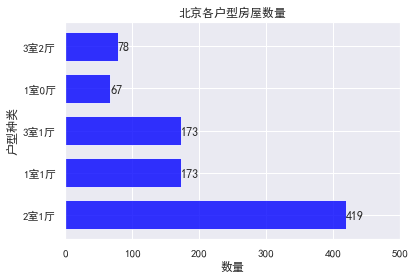

In [22]:
import matplotlib.pyplot as plt

# 设置显示中文字体
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ['SimHei']
# 避免由于字体更改导致部分字符无法正常显示
mpl.rcParams['axes.unicode_minus'] = False

house_type = show_houses['house_type']
num = show_houses['num']
plt.barh(range(5), num, height=0.7, color='blue', alpha=0.8)
plt.yticks(range(5), house_type)
plt.xlim(0, 500)
plt.xlabel('数量')
plt.ylabel('户型种类')
plt.title('北京各户型房屋数量')
for x, y in enumerate(num):
    ## plt.text()表示无指向注释,这里注释的是每个小条的长度,即这类户型的数量
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()